# Structure from Motion

</br> 
In this lab, you will build up VisualSFM system on your own device and reconstruct a 3D point cloud with arbitrary set of images. 

The link of VisualSFM is provided: http://ccwu.me/vsfm/index.html
</br></br> 
Also, you need to download the meshlab or other software to visualize your point cloud model.

The link of MeshLab is provided: https://www.meshlab.net/#download
</br></br>


Here is the sample output of the 3D reconstrucion. I used about 40 images to reconstruct the scene. 
</br></br>
After completing the reconstruction, you need to convert the point cloud to the right scale, the samlpe code is provided below. 

**Hint:**
- You need to select one object in the point cloud model and measure the size of the object in real world and model separately. 

- In MeshLab, there is a measuring tool so that you can  measure the distance of two points.

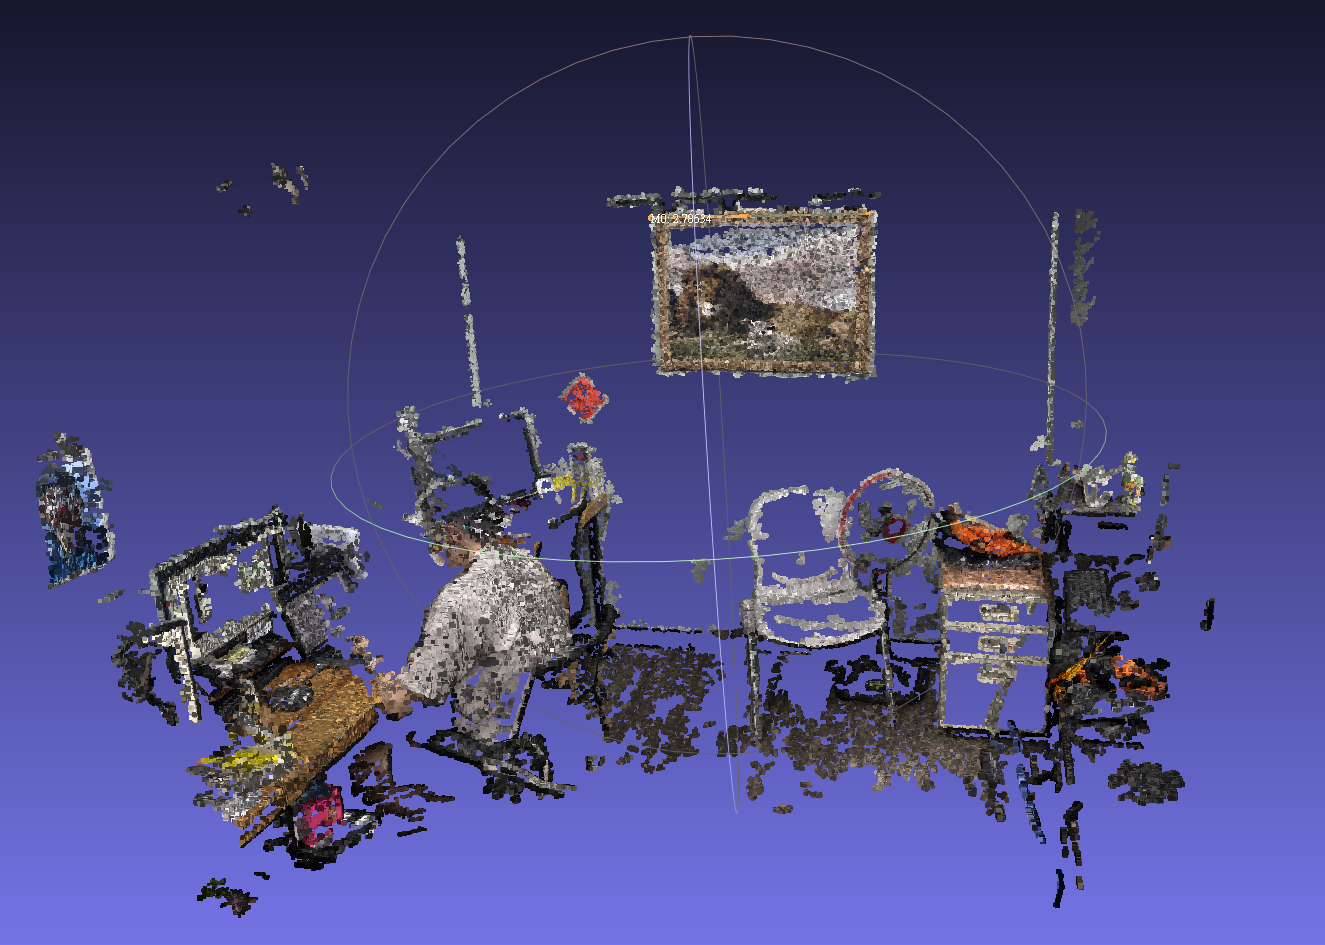

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install plyfile

In [3]:
import numpy as np
from plyfile import PlyData, PlyElement

##### TODO: upload your own point cloud model to google drive and read the file. #####

root_path = '/content/gdrive/MyDrive/' ## the folder of the input and output point cloud
file_name = 'machine.ply' ## ply file name

In [4]:
def write_ply(save_path, points):
  """
  save_path: path to save ply
  points: point cloud array
  """
  vertex_data = [(points[i][0], points[i][1], points[i][2], 
                  points[i][3], points[i][4], points[i][5], 
                  points[i][6], points[i][7], points[i][8], points[i][9]) for i in range(points.shape[0])]
  vertex_ = np.array(vertex_data, dtype=[('x', 'double'), ('y', 'double'), ('z', 'double'),
                                      ('nx', 'double'), ('ny', 'double'), ('nz', 'double'),
                                      ('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('psz', 'float')])

  vertex = PlyElement.describe(vertex_, 'vertex')
  PlyData([vertex], text=True).write(save_path)


In [5]:
pcd = PlyData.read(root_path+file_name)
points = np.array(pcd['vertex'].data)

# check the data structure of ply file
print(pcd)
print(points[:5])

#### TODO: complete the transformation matrix to scale the point cloud to the right scale. ####
# The scale = real world scale / lenght measured in point cloud 

scale = 1.02/1.4776
T = [[scale,0,0,0],[0,scale,0,0],[0,0,scale,0],[0,0,0,1]]

# apply the transformation matrix on all points
new_points = np.zeros([points.shape[0], 10])
for i,p in enumerate(points):
  point_xyz = np.asarray([p[0], p[1], p[2], 1])
  scaled = np.dot(point_xyz, T)
  new_points[i] = [scaled[0], scaled[1], scaled[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9]]

# save the scaled point cloud
write_ply(root_path+'scaled.ply', new_points)

ply
format binary_little_endian 1.0
comment VCGLIB generated
element vertex 115399
property float x
property float y
property float z
property float nx
property float ny
property float nz
property uchar red
property uchar green
property uchar blue
property uchar alpha
element face 0
property list uchar int vertex_indices
end_header
[(0.533264, -1.23972, -0.417069, -0.107694 , 0.570986,  0.813866 , 169, 176, 160, 255)
 (0.596735, -1.22165, -0.427096, -0.0745511, 0.771218,  0.63219  , 148, 165, 153, 255)
 (0.640472, -1.20087, -0.430686, -0.315926 , 0.919773, -0.232827 , 144, 159, 146, 255)
 (0.688363, -1.1804 , -0.432316, -0.303445 , 0.952037, -0.0393269, 157, 169, 153, 255)
 (0.751831, -1.17263, -0.445695, -0.511317 , 0.841491, -0.174494 , 175, 179, 158, 255)]
